# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [3]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [4]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [5]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b    2.717691
c   -0.574001
d    0.588947
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [8]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [11]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    11.433572
2018-11-20 14:45:00     9.741271
2018-11-21 14:45:00    10.943178
2018-11-22 14:45:00     9.383641
Freq: D, dtype: float64 

2018-11-19 14:45:00    11.433572
2018-11-20 14:45:00     9.741271
2018-11-21 14:45:00    10.943178
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [12]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [5]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,-1.337587,0.267125,-1.649863,0.673385
2018-11-19 15:45:00,0.329231,-0.284112,-1.608086,-0.262385
2018-11-19 16:45:00,0.109937,-0.209645,-0.310737,-0.375133
2018-11-19 17:45:00,0.071146,-1.996178,-1.606744,-0.563192
2018-11-19 18:45:00,1.546924,-0.002867,-1.334275,-0.978298
2018-11-19 19:45:00,-0.191893,-0.376991,0.472421,1.651858
2018-11-19 20:45:00,-1.262299,-1.552156,1.001440,0.329514
2018-11-19 21:45:00,0.583960,-0.814357,0.318622,1.553210
2018-11-19 22:45:00,-1.898461,-1.186365,-0.174830,1.572101
2018-11-19 23:45:00,-1.371886,0.386192,-2.367539,-0.346156


or by means of a dictionary:


In [4]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [ ]:
df2

### Viewing Data

In [14]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,-0.553279,-0.167743,-0.756489,-1.480444
2018-11-19 15:45:00,0.845811,0.504143,1.251828,1.160802
2018-11-19 16:45:00,0.164717,-0.778178,-2.396250,-1.146024
2018-11-19 17:45:00,0.006012,0.845194,0.113240,0.071676
2018-11-19 18:45:00,-0.711367,-0.644225,0.572500,-2.388531


In [15]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,-1.026250,0.422881,1.147329,-0.343680
2018-11-19 21:45:00,-1.076442,1.127507,2.179316,1.164386
2018-11-19 22:45:00,-0.119157,-1.851742,1.275527,1.257347
2018-11-19 23:45:00,1.155864,0.334272,-1.353282,0.718231


In [16]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [17]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [18]:
df.values

array([[-0.55327948, -0.16774277, -0.75648915, -1.48044426],
       [ 0.84581061,  0.5041434 ,  1.25182784,  1.16080204],
       [ 0.16471679, -0.77817813, -2.39624987, -1.1460241 ],
       [ 0.00601157,  0.84519416,  0.11323953,  0.07167588],
       [-0.71136668, -0.6442251 ,  0.57249953, -2.38853115],
       [ 0.16723844,  0.98766137,  0.37320722,  0.00456369],
       [-1.02625034,  0.42288109,  1.14732924, -0.34367976],
       [-1.07644177,  1.12750683,  2.17931575,  1.16438562],
       [-0.11915667, -1.85174168,  1.27552695,  1.25734731],
       [ 1.15586407,  0.33427185, -1.35328203,  0.71823065]])

In [19]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.114685,0.077977,0.240693,-0.098167
std,0.746347,0.938243,1.386683,1.248871
min,-1.076442,-1.851742,-2.396250,-2.388531
25%,-0.671845,-0.525105,-0.539057,-0.945438
50%,-0.056573,0.378576,0.472853,0.038120
75%,0.166608,0.759931,1.225703,1.050159
max,1.155864,1.127507,2.179316,1.257347


In [ ]:
df.T

In [23]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2018-11-19 14:45:00,0.673385,-1.649863,0.267125,-1.337587
2018-11-19 15:45:00,1.084386,-4.907813,0.250139,-2.345944
2018-11-19 16:45:00,1.120253,-8.476499,0.023508,-3.244364
2018-11-19 17:45:00,0.592929,-13.651929,-2.199302,-4.071638
2018-11-19 18:45:00,-0.912693,-20.161634,-4.424978,-3.351988
2018-11-19 19:45:00,-0.766458,-26.198918,-7.027646,-2.824230
2018-11-19 20:45:00,-0.290708,-31.234763,-11.182470,-3.558772
2018-11-19 21:45:00,1.738252,-35.951985,-16.151650,-3.709354
2018-11-19 22:45:00,5.339312,-40.844037,-22.307196,-5.758396
2018-11-19 23:45:00,8.594217,-48.103628,-28.076550,-9.179325


In [24]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 23:45:00,-9.179325,-28.076550,-48.103628,8.594217
2018-11-19 22:45:00,-5.758396,-22.307196,-40.844037,5.339312
2018-11-19 21:45:00,-3.709354,-16.151650,-35.951985,1.738252
2018-11-19 20:45:00,-3.558772,-11.182470,-31.234763,-0.290708
2018-11-19 19:45:00,-2.824230,-7.027646,-26.198918,-0.766458
2018-11-19 18:45:00,-3.351988,-4.424978,-20.161634,-0.912693
2018-11-19 17:45:00,-4.071638,-2.199302,-13.651929,0.592929
2018-11-19 16:45:00,-3.244364,0.023508,-8.476499,1.120253
2018-11-19 15:45:00,-2.345944,0.250139,-4.907813,1.084386
2018-11-19 14:45:00,-1.337587,0.267125,-1.649863,0.673385


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [20]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00   -0.553279
2018-11-19 15:45:00    0.845811
2018-11-19 16:45:00    0.164717
2018-11-19 17:45:00    0.006012
2018-11-19 18:45:00   -0.711367
2018-11-19 19:45:00    0.167238
2018-11-19 20:45:00   -1.026250
2018-11-19 21:45:00   -1.076442
2018-11-19 22:45:00   -0.119157
2018-11-19 23:45:00    1.155864
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00   -0.553279
2018-11-19 15:45:00    0.845811
2018-11-19 16:45:00    0.164717
2018-11-19 17:45:00    0.006012
2018-11-19 18:45:00   -0.711367
2018-11-19 19:45:00    0.167238
2018-11-19 20:45:00   -1.026250
2018-11-19 21:45:00   -1.076442
2018-11-19 22:45:00   -0.119157
2018-11-19 23:45:00    1.155864
Freq: H, Name: A, dtype: float64


In [ ]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

### Selection by label

In [22]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A   -0.553279
B   -0.167743
C   -0.756489
D   -1.480444
Name: 2018-11-19 14:45:00, dtype: float64

In [23]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,-0.553279,-0.167743
2018-11-19 15:45:00,0.845811,0.504143
2018-11-19 16:45:00,0.164717,-0.778178
2018-11-19 17:45:00,0.006012,0.845194
2018-11-19 18:45:00,-0.711367,-0.644225
2018-11-19 19:45:00,0.167238,0.987661
2018-11-19 20:45:00,-1.026250,0.422881
2018-11-19 21:45:00,-1.076442,1.127507
2018-11-19 22:45:00,-0.119157,-1.851742
2018-11-19 23:45:00,1.155864,0.334272


In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

In [20]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

-2.3459442729419946
-2.3459442729419946


### Selecting by position

In [ ]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [24]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,0.845811,0.504143,1.251828,1.160802
2018-11-19 17:45:00,0.006012,0.845194,0.113240,0.071676
2018-11-19 19:45:00,0.167238,0.987661,0.373207,0.004564
2018-11-19 20:45:00,-1.026250,0.422881,1.147329,-0.343680
2018-11-19 21:45:00,-1.076442,1.127507,2.179316,1.164386
2018-11-19 23:45:00,1.155864,0.334272,-1.353282,0.718231


In [25]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,NaN,NaN,NaN,NaN
2018-11-19 15:45:00,0.845811,0.504143,1.251828,1.160802
2018-11-19 16:45:00,0.164717,NaN,NaN,NaN
2018-11-19 17:45:00,0.006012,0.845194,0.113240,0.071676
2018-11-19 18:45:00,NaN,NaN,0.572500,NaN
2018-11-19 19:45:00,0.167238,0.987661,0.373207,0.004564
2018-11-19 20:45:00,NaN,0.422881,1.147329,NaN
2018-11-19 21:45:00,NaN,1.127507,2.179316,1.164386
2018-11-19 22:45:00,NaN,NaN,1.275527,1.257347
2018-11-19 23:45:00,1.155864,0.334272,NaN,0.718231


### Setting

Combination of selection and setting of values

In [27]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [28]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.267125,-1.649863,5,0.0,0,1.000000
2018-11-19 15:45:00,-2.345944,0.250139,-4.907813,5,0.5,2,0.999962
2018-11-19 16:45:00,-3.244364,0.023508,-8.476499,5,1.0,4,0.999848
2018-11-19 17:45:00,-4.071638,-2.199302,-13.651929,5,1.5,6,0.999657
2018-11-19 18:45:00,-3.351988,-4.424978,-20.161634,5,2.0,8,0.999391
2018-11-19 19:45:00,-2.824230,-7.027646,-26.198918,5,2.5,10,0.999048
2018-11-19 20:45:00,-3.558772,-11.182470,-31.234763,5,3.0,12,0.998630
2018-11-19 21:45:00,-3.709354,-16.151650,-35.951985,5,3.5,14,0.998135
2018-11-19 22:45:00,-5.758396,-22.307196,-40.844037,5,4.0,16,0.997564
2018-11-19 23:45:00,-9.179325,-28.076550,-48.103628,5,4.5,18,0.996917


In [29]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-0.267125,-1.649863,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-2.345944,-0.250139,-4.907813,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-3.244364,-0.023508,-8.476499,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-4.071638,-2.199302,-13.651929,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-3.351988,-4.424978,-20.161634,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-2.824230,-7.027646,-26.198918,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-3.558772,-11.182470,-31.234763,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-3.709354,-16.151650,-35.951985,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-5.758396,-22.307196,-40.844037,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-9.179325,-28.076550,-48.103628,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [30]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(columns=['E prime'])

,A,B,C,D,E,cosine
2018-11-19 14:45:00,0.000000,0.267125,-1.649863,5,0.0,1.000000
2018-11-19 15:45:00,-2.345944,0.250139,-4.907813,5,0.5,0.999962
2018-11-19 16:45:00,-3.244364,0.023508,-8.476499,5,1.0,0.999848
2018-11-19 17:45:00,-4.071638,-2.199302,-13.651929,5,1.5,0.999657
2018-11-19 18:45:00,-3.351988,-4.424978,-20.161634,5,2.0,0.999391
2018-11-19 19:45:00,-2.824230,-7.027646,-26.198918,5,2.5,0.999048
2018-11-19 20:45:00,-3.558772,-11.182470,-31.234763,5,3.0,0.998630
2018-11-19 21:45:00,-3.709354,-16.151650,-35.951985,5,3.5,0.998135
2018-11-19 22:45:00,-5.758396,-22.307196,-40.844037,5,4.0,0.997564
2018-11-19 23:45:00,-9.179325,-28.076550,-48.103628,5,4.5,0.996917


In [31]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.267125,-1.649863,5,0.0,0,1.000000
2018-11-19 19:45:00,-2.824230,-7.027646,-26.198918,5,2.5,10,0.999048
2018-11-19 20:45:00,-3.558772,-11.182470,-31.234763,5,3.0,12,0.998630
2018-11-19 21:45:00,-3.709354,-16.151650,-35.951985,5,3.5,14,0.998135
2018-11-19 22:45:00,-5.758396,-22.307196,-40.844037,5,4.0,16,0.997564
2018-11-19 23:45:00,-9.179325,-28.076550,-48.103628,5,4.5,18,0.996917


In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [34]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,NaN,0.267125,NaN,5,NaN,NaN,1.000000
2018-11-19 15:45:00,NaN,0.250139,NaN,5,0.5,2.0,0.999962
2018-11-19 16:45:00,NaN,0.023508,NaN,5,1.0,4.0,0.999848
2018-11-19 17:45:00,NaN,NaN,NaN,5,1.5,6.0,0.999657
2018-11-19 18:45:00,NaN,NaN,NaN,5,2.0,8.0,0.999391
2018-11-19 19:45:00,NaN,NaN,NaN,5,2.5,10.0,0.999048
2018-11-19 20:45:00,NaN,NaN,NaN,5,3.0,12.0,0.998630
2018-11-19 21:45:00,NaN,NaN,NaN,5,3.5,14.0,0.998135
2018-11-19 22:45:00,NaN,NaN,NaN,5,4.0,16.0,0.997564
2018-11-19 23:45:00,NaN,NaN,NaN,5,4.5,18.0,0.996917


In [35]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [ ]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

In [33]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,0.267125,-1.649863,5,0.0,0,1.000000
2018-11-19 15:45:00,-2.345944,0.517265,-6.557676,10,0.5,2,1.999962
2018-11-19 16:45:00,-5.590308,0.540772,-15.034175,15,1.5,6,2.999810
2018-11-19 17:45:00,-9.661946,-1.658530,-28.686104,20,3.0,12,3.999467
2018-11-19 18:45:00,-13.013934,-6.083508,-48.847739,25,5.0,20,4.998858
2018-11-19 19:45:00,-15.838164,-13.111154,-75.046657,30,7.5,30,5.997906
2018-11-19 20:45:00,-19.396936,-24.293624,-106.281420,35,10.5,42,6.996536
2018-11-19 21:45:00,-23.106289,-40.445274,-142.233404,40,14.0,56,7.994670
2018-11-19 22:45:00,-28.864685,-62.752470,-183.077441,45,18.0,72,8.992234
2018-11-19 23:45:00,-38.044010,-90.829020,-231.181069,50,22.5,90,9.989152


In [32]:
df.apply(lambda x: x.max() - x.min())

A           9.179325
B          28.343675
C          46.453764
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [ ]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

Let's play it hard and load (in memory) a (relatively) large dataset

In [10]:
file_name="/Users/albertochimenti/data/data_000636.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,60,3869187117,788,15
1,1,0,63,3869187117,787,23
2,1,0,64,3869187117,786,12
3,1,1,1,3869187117,1078,14
4,1,0,27,3869187117,1080,9
5,1,0,49,3869187117,1077,3
6,1,1,11,3869187117,1078,19
7,1,0,139,3869187117,1083,0
8,1,0,32,3869187117,1081,27
9,1,0,50,3869187117,1078,24


Let's know do some operations among (elements of) columns

In [11]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [ ]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

In [ ]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

In [ ]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

In [ ]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [6]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [7]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.021098,-0.614140
1,bar,one,0.025595,-1.156548
2,foo,two,-0.396306,1.480197
3,bar,three,-0.241032,-1.392444
4,foo,two,-0.777162,0.096433
5,bar,two,-1.065872,1.298813
6,foo,one,-0.018824,0.840230
7,foo,three,-2.656345,-0.236896


In [22]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.281310,-1.250180
foo,-3.827539,1.565824


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

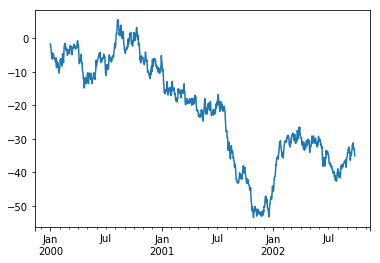

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

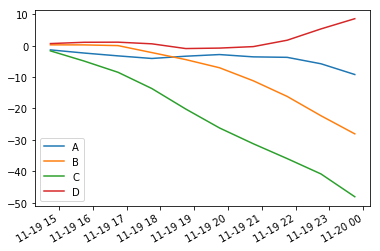

In [16]:
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')